# ECS7020P mini-project

## 1. Author

**Student Name**: Shahin Mammadov
**Student ID**: 240315623  



# 2. Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

The problem we are trying to solve here is a binary classification problem in the domain of audio and speech processing. We have a dataset of voice memos where individuals tell stories. Each story is labeled either 
* True story
* Deceptive story

The goal is to build a sufficient machine learning model that can predict whether a given voice memo contains a true or a deceptive story, based on the audio features extracted from recordings. This is a very interesting problem to solve, because it combines aspects of audio processing, psychology and speech analysis. It requires to understand how to preprocess raw audio signals and extract meaningful features. 

Audio is not given to us in a numerical format, so we will need to convert unstructured audio into structured numerical data for our model. Logically thinking, when person lies, vocal patterns, tone and speech delivery can provide clues, of which we can use as features to train our model. After training our model with given features, it will be able to predict whether new voice memos are true or deceptive which can be further used for lie detection, fraud prevention or analyzing public speaking.

# 3. Methodology

To solve this problem of classifying voice memos into true or deceptive stories, I will adopt the following methodology:

### 3.1 Training Task
The training task involves teaching a machine learning model to classify audio features extracted from voice memos into two categories: True Story or Deceptive Story. The methodology for training includes:
#### a) Data Preprocessing
Before training our model, we need to make sure that our data is consistent and ready for modeling:
1. Audio cleaning:
    * Normalize audio signals
    * Remove leading and trailing silences
2. Audio Augmentation:
To increase the dataset variability and robustness, I apply random audio augmentations to make model robust to variations
    * Pitch Shift: Simulate variations in tone or voice pitch
    * Time Stretching: Simulate faster or slower speech delivery
    * Noise Injection: Add background noise to mimic real-world recording environments.
3. Segmentation:
    * Truncate the longer recordings to a fixed length (30 seconds)
4. Feature Extraction:
Extract temporal, spectral and prosodic features such as:
    * MFCCs, chroma features, zero-crossing rate, RMS energy, spectral centroid etc.
### 3.2 Validation Task
The validation task evaluates how well the trained model generalizes to unseen data. It ensures that the model not only work well on training set, but will is also robust and reliable for new and unseen voice memo. 
#### a) Model Selection
We will evaluate the performance of many machine learning models, which are known for being efficient and useful in handling high dimensional features extracted from audio data. These models include:
* Gradient Boosting Models
* Random Forests
* Support Vector Machines
* Baseline Models

#### b) Validation Dataset
The dataset will be divided into 3 subsets:
* Training set (70% of the data): Will be used for training the model
* Testing set (15% of the data): Portion of the dataset used during testing, hyperparameter tuning and early stopping
* Validation set (15% of the data): A completely unseen data used to evaluate the final model

#### c) Validation Workflow
 1. Cross Validation
    * Use k-fold cross-validation to ensure that the model performs consistently across different subsets of training data
 2. Hyperparameter Tuning
    * For complex models we will use hyperparameter tuning to see which parameters returns the best results
 3. Feature Importance Analysis
    * For models such as Random Forest and XGBoost, feature importance scores are analyzed to undersand which features contributes the most to classification performance

#### d) Performance Metrics
 1. Accuracy: Measures the overall correctness of the predictions
 2. Precision: Measures the proportion of positive predictions that are actually correct
 3. Recall: Measures the proportion of actual deceptive stories correctly predicted
 4. F1-Score: Balance between the precision and recall
 5. Confusion Matrix

# 4 Implemented ML prediction pipelines

## 4.1 Preprocessing stage
The preprocessing stage ensures that the raw audio files are consistent and ready for feature extraction. 
* Input: Raw audio file (.wav)
* Steps:
   1. Clean Audio:
        * Normalize the amplitude of the audio
        * Remove the silence 
   2. Audio Augmentation
        * Apply pitching, time stretching and inject noise to create augmented version of our data
   3. Padding/Truncation:
        * Shorten all audio clips to 30 seconds.
* Output: Cleaned and standardized audio data. 

## 4.2 Transformation stage
The transformation stage converts cleaned audio data into numerical features for machine learning model.
* Input: Cleaned audio data
* Steps:
     1. Feature Extraction:
          * Temporal features: Zero crossing rate, RMS energy
          * Spectral features: MFCCs, chroma, spectral centroid, bandwidth, contrast, flatness and rolloff.
          * Rhythmic features: Tempo.
          * Harmonic/Percussive components: Decompose the signal to analyze tonal and percussive parts.
          * Mel Spectrogram: Provides a time-frequency representation of the signal.
     2. Feature Scaling:
          * Normalize and standartize features to ensure consistency of the data
     3. Feature Selection:
          * Identify the most relevant features using the techniques such as Random Forest or XGBoost
* Output: Feature vectors in tabular format

## 4.3 Model stage
The model stage trains the learning algorithm on the extracted features
* Input: Feature vectors
* Steps:
     1. Model Selection:
          * Gradient Boosting (XGBoost, LightGBM)
          * Random Forests
          * Support Vector Machines
          * Logistic Regression
     2. Hyperparameter Tuning:
          * Optimize the hyperparameters using the grid search or random search
     3. Training:
          * Train the models on the training set
          * Evaluate the performances of each model using the performance metrics:
               1. Accuracy: Measures the overall correctness of the predictions
               2. Precision: Measures the proportion of positive predictions that are actually correct
               3. Recall: Measures the proportion of actual deceptive stories correctly predicted
               4. F1-Score: Balance between the precision and recall
               5. Confusion Matrix
     4. Output: Predicted probabilities
## 4.4 Ensemble stage
The ensemble stage combines predictions from multiple models to improve the overall accuracy and robustness
* Input: Predictions from multiple models
* Steps:
     1. Voting Mechanism:
          * Use soft or hard voting to aggregate predictions
     2. Weight Assignment:
          * Assign weights to models based on their validation performance
     3. Final Prediction:
          * Combine individual predictions to produce a single output
* Output: Final ensemble prediction

# 5 Dataset
Dataset provided, MLEnd Deception dataset, contains 100 voice memos, each in either english or different language, a csv file which has 3 columns, file name, language and story type. We will preprocess and extract features from data in the next steps.
## 5.1 Dataset workflow
* Preprocessing
    1. Audio Cleaning: Removing non-informative partions of the audio signal and normalizing so all files has consistent volume levels
    2. Padding or Truncation: Ensuring all audio files are of the same length, 30 seconds.
    3. Augment Audio: Introduce variability into the dataset to mimic real-world conditions, by applyinh pitch shift which simulates changes in speaker tone or delivery, time stretching which simulates faster or slower speech patterns and noise injection, which simulates noisy environments like background chatter or recording artifacts.
* Feature extraction
    1. Mel-Frequency Cepstral Coefficients: MFCCs are one of the most widely used features in speech processing. They represent the spectral envelope of the audio, capturing how energy is distributed across the different frequency bands. Helps distinguish vocal characteristics like pitch, intonation and rythm.
    2. Chroma Features: It captures the pitch class distribution in the signal. Differences in speech might indicate stress or emotional variation.
    3. Zero Crossing Rate: ZCR measures the rate of sign changes in the audio signal, reflecting noisiness or percussive content. ZCR increases when there is hesitations, abrubt changes or stressed voices.
    4. Root Mean Square Energy: It represents the loudness of the audio signal. Variations in loudness can indicate emotional emphasis or stress, helping differentiate storytelling styles.
    5. Spectral Features: These features represents the frequency content and its distribution such as center of mass of the spectrum, spread of frequencies around centroid, difference in amplitude between spectral peaks and valleys, indication of noise-like properties and identifying high-frequency content
    6. Tempo: This estimates the beats per minute in the voice memo, capturing the rythm of the speech. Deceptive stories might be delivered rushed or slower than truthful ones.
    7. Mel Spectogram: Provides a time-frequency representation of the audio, capturing changes in frequency content over time, which helps to analyze dynamic properties of speech.
    8. Harmonic and Percussive Components: Decomposes the signal into harmonic and percussive components, which can help identify the smoothness in speech delivery versus abrubt pauses.
## 5.2 Final dataset
After preprocessing and extracting features from the original MLEnd dataset, we add features into array called X and add the label to y. X contains 196 features, consisting:
* MFCCS: 40
* Chroma: 12
* ZCR: 1
* Spectral features: 12
* Tempo: 1
* Mel spectogram: 128
* Harmonic: 1
* Percussive: 1

Dataset for features and labels are save inside MLEnd/deception folder named as "transformed_data_x.csv" and "transformed_data_y.csv". This is done so that user do not have to run feature_extraction function, which can take many minutes depending on the system. Until the main dataset changes, I will keep using the generated csv files.

In [2]:
import mlend
from mlend import download_deception_small, deception_small_load

In [8]:
import librosa
import numpy as np  
import pandas as pd
import random

In [ ]:
def clean_audio(file_path, target_sr=16000):
    y, sr = librosa.load(file_path, sr=target_sr, mono=True)
    y = librosa.effects.trim(y, top_db=20)[0]  # Remove silence
    y = librosa.util.normalize(y)  # Normalize amplitude
    return y

def augment_audio(y, sr):
    # Random pitch shift
    n_steps = random.uniform(-2, 2)
    y = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)
    # Random time stretch
    rate=random.uniform(0.8, 1.2)
    y = librosa.effects.time_stretch(y, rate=rate)
    # Add background noise
    noise = np.random.normal(0, 0.005, len(y))
    y = y + noise
    return librosa.util.normalize(y)

def pad_or_truncate(y, target_length=480000): 
    if len(y) > target_length:
        return y[:target_length]
    else:
        return np.pad(y, (0, max(0, target_length - len(y))), mode='constant')

def extract_advanced_features(file_path):
    y = clean_audio(file_path)
    y = augment_audio(y, sr=16000)
    y = pad_or_truncate(y)
    
    # Extract features
    mfccs = librosa.feature.mfcc(y=y, sr=16000, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=y, sr=16000)
    zcr = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=16000)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=16000)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=16000)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=16000, roll_percent=0.85)
    tempo, _ = librosa.beat.beat_track(y=y, sr=16000)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=16000, n_mels=128)
    
    # Harmonic and Percussive components
    harmonic, percussive = librosa.effects.hpss(y)
    
    # Combine features
    features = np.hstack([
        np.mean(mfccs, axis=1),
        np.mean(chroma, axis=1),
        np.mean(zcr),
        np.mean(rms),
        np.mean(spectral_centroid),
        np.mean(spectral_bandwidth),
        np.mean(spectral_contrast, axis=1),
        np.mean(spectral_flatness),
        np.mean(spectral_rolloff),
        tempo,
        np.mean(harmonic),
        np.mean(percussive),
        np.mean(mel_spectrogram, axis=1)
    ])
    return features

I have used the library called **librosa** to extract audio features, because the library was specifically made for audio and music analysis which makes it really easy to extract the important features.

We can observe that many of the functions contain argument called **sr**, which stands for sample rate. Eventhough our voice samples are sampled at 44.1KHz, librosa function will resample it to 16000, or 16KHz, on the first function call **clean_audio**, which is done to reduce the computational load but will still retain the important features.

In **pad_or_truncate** function, we set target_length to 480000, to standartize the voice memoes length and set it 30 seconds. After resampling our data to 16KHz, which is 16000, we multiply it by 30 to get 480000.

In [29]:
data = pd.read_csv('MLEnd/deception/MLEndDD_story_attributes_small.csv')

X_features, y_labels = [], []

for _, row in data.iterrows():
    features = extract_advanced_features(f"MLEnd/deception/MLEndDD_stories_small/{row['filename']}")
    X_features.append(features)
    y_labels.append(row['Story_type'])

For every row in csv file received, we call the extract features function and we append the results to X_features and y_labels.

In [3]:
import csv

file_path_x = "MLEnd/deception/transformed_data_x.csv"
file_path_y = "MLEnd/deception/transformed_data_y.csv"

In [ ]:
with open(file_path_x, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(X_features)  # Save each sublist as a row

with open(file_path_y, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(y_labels)  # Save each sublist as a row


We write those rows to a new appropriate csv files so we dont have to run extract_features everytime as it takes long time.

In [4]:
with open(file_path_x, mode="r", newline="") as file:
    reader = csv.reader(file)
    X = [row for row in reader]

with open(file_path_y, mode="r", newline="") as file:
    reader = csv.reader(file)
    y = [row for row in reader]

y = y[0]

We read the values from the csv files and start the model evaluation.

In [5]:
print(f"Number of features in X: {len(X[0])}")
print(f"Number of columns in X: {len(X)}")
print(f"Number of columns in y: {len(y)}")

Number of features in X: 196
Number of columns in X: 100
Number of columns in y: 100


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = np.array(X)
y = LabelEncoder().fit_transform(y)

# First split: 70% training, 30% temporary (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
# Second split: Split the temporary set into 15% test and 15% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Here we convert X to numpy array as most machine learning models require numpy array. Values inside y (true, deceptive) are converted into numerical values (0, 1)

Then we split the data for training, where 70% of data is used for training, 15% is used for testing and other 15% is used for validation. I also added stratify property so that the every split, has even numbers of 0 and 1 labels. We will optimize our model based on the testing dataset, and apply our final model to validation dataset.

At last, we scale the data because each feature have different ranges. This function transforms the distribution of each feature to have a mean zero and standart deviation one, which ensures that the all features are on the same level, preventing any single feature from dominating the learning process.



# 6 Experiments and results

## 6.1. Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.60

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.60      0.75      0.67         8

    accuracy                           0.60        15
   macro avg       0.60      0.59      0.58        15
weighted avg       0.60      0.60      0.59        15



### Predicting deceptive stories: 
Precision: 0.60 — When the model predicts "deceptive," it is correct 60% of the time.

Recall: 0.43 — Out of all actual "deceptive" samples, the model identifies 43% correctly.

F1-Score: 0.50 — A balance between precision and recall for deceptive samples.

### Predicting true stories:
Precision: 0.60 — When the model predicts "true," it is correct 60% of the time.

Recall: 0.75 — Out of all actual "true" samples, the model identifies 75% correctly.

F1-Score: 0.67 — A balance between precision and recall for true samples.

### Overall performance
Accuracy is 60%, which means only 60% of testing data was predicted correctly. For a problem like this, I think its a good start. Our model says that its having harder time identifying deceptive samples correctly for class 0 compared to class 1.

The balanced accuracy suggests that the model struggles equally with both classes, as precision and recall are relatively close for both.

We will now perform hyper parameter tuning, to see which parameters for our model are giving the best results

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['lbfgs','newton-cg', 'newton-cholesky','liblinear','sag','saga'],  
    'max_iter': [100, 500, 1000, 2500, 5000],  
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
}

logreg = LogisticRegression()

# Perform Grid Search
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


Fitting 3 folds for each of 270 candidates, totalling 810 fits


/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.5

Test Accuracy: 0.4666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.00      0.00      0.00         8

    accuracy                           0.47        15
   macro avg       0.23      0.50      0.32        15
weighted avg       0.22      0.47      0.30        15



/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
450 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/

In [12]:
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.4666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.00      0.00      0.00         8

    accuracy                           0.47        15
   macro avg       0.23      0.50      0.32        15
weighted avg       0.22      0.47      0.30        15



/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The GridSearch went through all of the combinations for the parameters, but printed worse results from the first run, which was using default parameters. We can also see in classification report that the model completely failed identifying class 1. Sometimes, default parameters are the best parameters to be used, so in the future we know to not get confused when we see lower results when we tune the hyperparameters.

Now lets see the results using default parameters on unseen data:

In [226]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.47

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.46      0.86      0.60         7

    accuracy                           0.47        15
   macro avg       0.48      0.49      0.40        15
weighted avg       0.48      0.47      0.39        15



We can see that the results with the default parameters are lower than the results we got with testing dataset, I dont see any abnormality, report looks balanced enough, including both macro average and weighted average. The model is still having hard time identifying the deceptive samples as we can see that the recall for class 0 is very low.

Lets see the cross validation results just to make sure our model is stable.

In [227]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=7)

# Display the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.4 0.5 0.7 0.5 0.3 0.6 0.3]
Mean accuracy: 0.4714285714285714


Now we performed cross validation on our training set. I set split to 7, as we have 70 samples for training, so each batch comes to be 10 samples. The scores suggests that the model's performance is slightly inconsistent. This variability could be due to the small sample size, where certain splits may lack enough information to distinguish between classes effectively.

Lets see if dimensionality reduction using PCA will have any impact on our results:

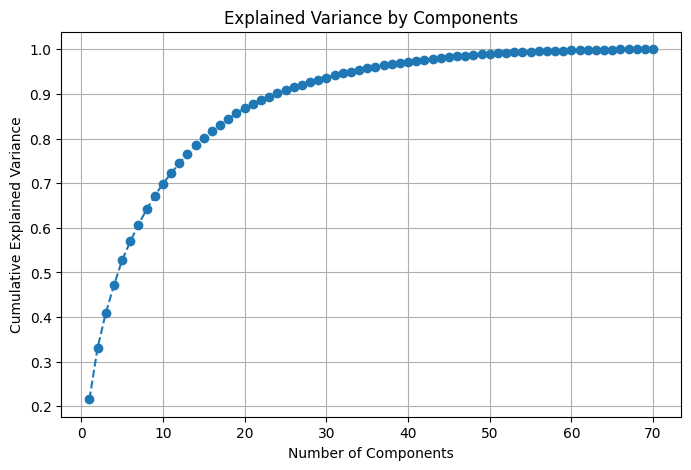

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.fit_transform(X_test_scaled)

# Step 3: Plot the explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [ ]:
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)
X_val_reduced = pca.transform(X_val_scaled)


Number of components to retain 95% variance: 34


In [68]:
model = LogisticRegression()
model.fit(X_train_reduced, y_train)

# Make predictions
y_pred = model.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.60

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.60      0.75      0.67         8

    accuracy                           0.60        15
   macro avg       0.60      0.59      0.58        15
weighted avg       0.60      0.60      0.59        15



In [69]:
model = LogisticRegression()
model.fit(X_train_reduced, y_train)

# Make predictions
y_pred = model.predict(X_val_reduced)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.33

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.36      0.57      0.44         7

    accuracy                           0.33        15
   macro avg       0.31      0.35      0.31        15
weighted avg       0.30      0.33      0.30        15



Dimensionality reduction did improve on training data, but it gave much worse results on unseen data, which tells me that PCA is not going to be useful in this case. Going from 60% to 33% on validation set indicates there is a big underfitting after PCA, and points to instability, meaning the model isnt able to generalize well across different sets of data.

## 6.2 SVM

In [216]:
from sklearn.svm import SVC

model = SVC(random_state=42)  
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.60

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.62      0.62      0.62         8

    accuracy                           0.60        15
   macro avg       0.60      0.60      0.60        15
weighted avg       0.60      0.60      0.60        15



We can observe that, our model has 60% accuracy, which is better start than logistic regression. The recall, precision and f1 scores are similar, macro averages and weighted averages are balanced.

Lets see if we can fix it by hyperparameter tuning, choice of kernel or regularization parameter might cause the model to favor one class.

In [217]:
param_grid = {
    'C': np.logspace(-3, 3, 10),  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Types of kernels
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 5)),  # Kernel coefficient
    'degree': [2, 3, 4, 5],  # Relevant only for 'poly' kernel
    'class_weight': [None, 'balanced'],  # Handles imbalanced classes
    }

logreg = SVC(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 1680 candidates, totalling 5040 fits
Best Parameters: {'C': 46.41588833612773, 'class_weight': 'balanced', 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.6002415458937199

Test Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.62      1.00      0.76         8

    accuracy                           0.67        15
   macro avg       0.81      0.64      0.60        15
weighted avg       0.79      0.67      0.61        15



The overall accuracy increased by ~7%, but we see that for class 0, precision is very high and recall is small, meaning model is correctly predicting class 0, but is missing many true positives. And in class 1, precision of 62% and 100% recall means our model is more biased towards class 1.

Overall it is better in my opinion, so lets use these parameters.

In [229]:
model = SVC(random_state=42, C=46.42, degree=4, gamma='auto', kernel='poly')  
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.60

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.55      0.86      0.67         7

    accuracy                           0.60        15
   macro avg       0.65      0.62      0.58        15
weighted avg       0.65      0.60      0.58        15



We used new parameters on unseen data, the metrics are balanced well enough, slightly being more biased towards class 1, probably because of us having very small sample of data.

In [230]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)

# Display the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.6 0.6 0.6 0.7 0.6 0.5 0.6]
Mean accuracy: 0.6


The cross validation on training data does not show signs of overfitting or underfitting, the accuracy being exact same as on the unseen data, we can assume that the model is stable.

## 6.3 Random Forests

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.62      0.62      0.62         8

    accuracy                           0.60        15
   macro avg       0.60      0.60      0.60        15
weighted avg       0.60      0.60      0.60        15



We can see 60% accuracy, and all the other metrics seem balanced well enough, no bias is visible. Lets see if hyperparameter tuning can improve our model.

In [ ]:
param_grid = {
    #'n_estimators': [100, 200, 300, 500],        # Number of trees
    #'max_depth': [10, 20, 30, None],            # Maximum depth
    #'min_samples_split': [2, 5, 10],            # Minimum samples to split a node
    #'min_samples_leaf': [1, 2, 4],              # Minimum samples at a leaf node
    #'max_features': ['sqrt', 'log2'],           # Features to consider for split
    #'class_weight': [None, 'balanced']          # Class weights for imbalanced data
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9],
}

_rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=_rf,
    param_grid=param_grid,
    cv=3,                      
    scoring='accuracy',        
    n_jobs=-1,                  # Use all processors
    verbose=1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 150}
Best Cross-Validation Score: 0.48490338164251207

Test Accuracy: 0.5333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.56      0.62      0.59         8

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.52        15
weighted avg       0.53      0.53      0.53        15



This again is proving our point that hyperparameter tuning wont always work because default parameters are the best ones. We see that all the metrics are lower now, no abnormal activity or skewness is visible though. We will keep on using the defaults for now.

Lets now look at which features are important and then take the ones that matter and feed it into our model.

In [98]:
feature_importances = rf_classifier.feature_importances_

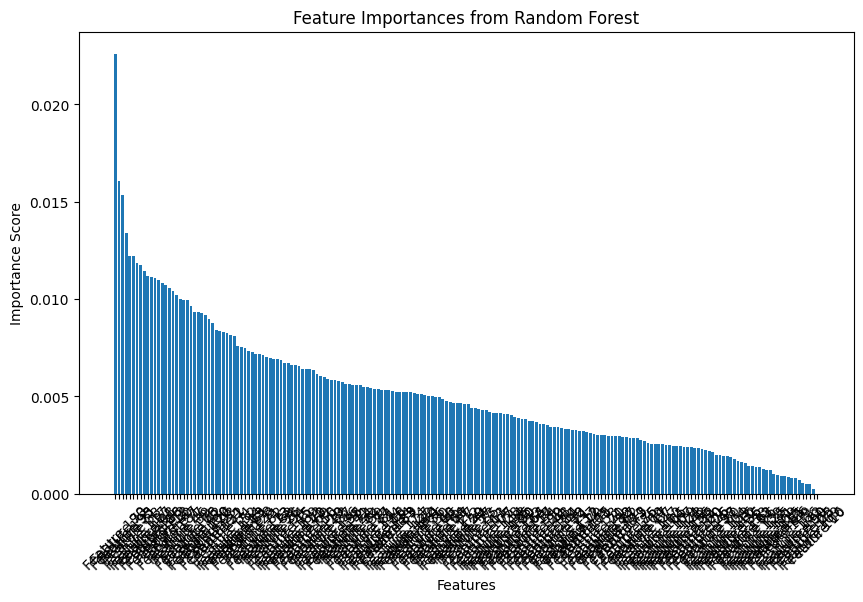

In [99]:
import matplotlib.pyplot as plt

feature_names = [f"Feature {i}" for i in range(X.shape[1])]

# Sort feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [100]:
top_features = np.argsort(feature_importances)[::-1]

# Print the top 2 features
print("Top Features:")
for i in top_features[:2]:
    print(f"Feature {i}, Importance: {feature_importances[i]:.4f}")

Top Features:
Feature 190, Importance: 0.0226
Feature 73, Importance: 0.0160


We see that the first 1/5th of our features has the most impact, so lets just use the top 40 features.

In [113]:
from sklearn.feature_selection import RFE

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=40)  # Select top 1/5th features
rfe.fit(X_train_scaled, y_train)


# Make predictions
y_pred = rfe.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.50      0.62      0.56         8

    accuracy                           0.47        15
   macro avg       0.45      0.46      0.44        15
weighted avg       0.45      0.47      0.45        15



We see that no improvements were made, we got lower accuracy and overall lower metrics, at this poind random guessing is much simpler. So we wont be using feature importance.

In [231]:
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_val_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.5333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.50      0.71      0.59         7

    accuracy                           0.53        15
   macro avg       0.55      0.54      0.52        15
weighted avg       0.55      0.53      0.52        15



In [233]:
scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=7)

# Display the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.6 0.4 0.6 0.5 0.5 0.5 0.2]
Mean accuracy: 0.4714285714285715


The model is stable, as we can see that the scores are not that far off from each other, and the mean accuracy is close to the accuracy we received on the unseen data.

## 6.4 XGBoost

In [123]:
pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [129]:
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.56      0.62      0.59         8

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.52        15
weighted avg       0.53      0.53      0.53        15



Overall balanced metrics, slightly better than random guessing. Lets test DMatrix provided by XGBoost, for optimizing the data structure for training.

In [132]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.3,
    "max_depth": 6
}

bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred = bst.predict(dtest)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.5333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.56      0.62      0.59         8

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.52        15
weighted avg       0.53      0.53      0.53        15



Well, DMatrix didnt even do anything, atleast it did not lower the metrics :D

Lets do some hyperparameter tuning

In [204]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:54:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:54:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:54:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:54:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

/Users/shahinmammadov/.pyenv/versions/myenv/lib/python3.8/site-packa

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Score: 0.5706521739130435

Test Accuracy: 0.4666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.50      0.62      0.56         8

    accuracy                           0.47        15
   macro avg       0.45      0.46      0.44        15
weighted avg       0.45      0.47      0.45        15



Worse than the default parameters, not surprised, wont be using those parameters, lets see of RandomizedSearch finds better params.

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'n_estimators': randint(100, 500)
}

random_search = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=3, verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': 0.9088912818519365, 'learning_rate': 0.15245411798488842, 'max_depth': 7, 'n_estimators': 212, 'subsample': 0.9993221455146826}
Best score: 0.5422705314009661


In [137]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.5333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.55      0.75      0.63         8

    accuracy                           0.53        15
   macro avg       0.52      0.52      0.50        15
weighted avg       0.52      0.53      0.51        15



We got the same accuracy as the one with default, but looking closely, we can see that this model with tuned parameters is more biased towards class 1, and macro average and weighted average is slightly lower, so I will continue using default params.

In [234]:
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_val_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.40      0.57      0.47         7

    accuracy                           0.40        15
   macro avg       0.40      0.41      0.39        15
weighted avg       0.40      0.40      0.38        15



Not the results I am looking for, but this is the accuracy and report for the unseen data, below 50%. I will continue with different gradient models to see if they perform better.

In [236]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)

# Display the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.6 0.7 0.6 0.4 0.5 0.5 0.5]
Mean accuracy: 0.5428571428571428


The cross validation scores using the training set shows that no underfitting or overfitting occurred, scores being stable and not far off from the accuracy score we received using the unseen data.

## 6.4 LightGBM

In [145]:
pip install lightgbm


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [146]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 35, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4887
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 196
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Not a good start, but we can still play around with the model. Lets use Dataset class for optimizing memory usage and speed:

In [150]:
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
bst = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)

# Make predictions
y_pred = bst.predict(X_test_scaled)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

[LightGBM] [Info] Number of positive: 35, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4887
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 196
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Did not expect much because the function itself is just a preprocessing the data, but due to our data having no nulls and overall being processed, we dont see any improvements.

Lets do some hyperparameter tuning:

In [161]:
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

# Initialize the model
model = LGBMClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Number of positive: 23, number of negative: 23
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 46, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [162]:
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 20, 'subsample': 0.7}

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.55      0.75      0.63         8

    accuracy                           0.53        15
   macro avg       0.52      0.52      0.50        15
weighted avg       0.52      0.53      0.51        15



Finally we can see that hyperparameter tuning improved the results, now accuracy is ~6% better, and the classification report seems solid and balanced, but skewed towards class 1.

Lets see what RandomizedSearch returns us.

In [163]:
param_dist = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

random_search = RandomizedSearchCV(LGBMClassifier(random_state=42), param_dist, n_iter=50, scoring='accuracy', cv=3, verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 23, number of negative: 23
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 46, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [164]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.5333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.55      0.75      0.63         8

    accuracy                           0.53        15
   macro avg       0.52      0.52      0.50        15
weighted avg       0.52      0.53      0.51        15



Exactly same results, so we can assume the parameters choses by both methods are same also.

Now lets apply these parameters to a model and predict unseen data

In [237]:
model = LGBMClassifier(random_state=42, subsample = 0.8, num_leaves = 20, n_estimators = 200, learning_rate = 0.1, colsample_bytree = 0.7)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_val_scaled)

[LightGBM] [Info] Number of positive: 35, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4887
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 196
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [238]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.5333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.50      1.00      0.67         7

    accuracy                           0.53        15
   macro avg       0.75      0.56      0.44        15
weighted avg       0.77      0.53      0.43        15



Model is overly biased toward class 1, the macro average and weighted average is also low, meaning poor overall performance. Its not the first time of us seeing the model being biased towards class 1, so its more likely our dataset being small and even smaller for testing and validation datasets.

In [239]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)

# Display the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

[LightGBM] [Info] Number of positive: 30, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4245
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 196
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

No abnormal activity that I can see, the model is not overfitted or underfitted to training set, very stable results.

## 6.5 Ensemble

### 6.5.1 Bagging

In [240]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression()
model2 = RandomForestClassifier(random_state=42)
model3 = SVC(random_state=42, C=46.42, degree=4, gamma='auto', kernel='poly', probability=True)
model4 = XGBClassifier(random_state=42)
model5 = LGBMClassifier(random_state=42, subsample = 0.8, num_leaves = 20, n_estimators = 200, learning_rate = 0.1, colsample_bytree = 0.7)

voting_model = VotingClassifier(estimators=[
    ('lr', model1),
    ('rf', model2),
    ('svc', model3),
    ('xgb', model4),
    ('lgbm', model5)
], voting='hard')  # Use 'hard' for majority voting

voting_model.fit(X_train_scaled, y_train)

test_all_X = np.vstack((X_test_scaled, X_val_scaled))
test_all_y = np.hstack((y_test, y_val))

# Evaluate
y_pred = voting_model.predict(test_all_X)

[LightGBM] [Info] Number of positive: 35, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4887
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 196
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [241]:
print("Accuracy:", accuracy_score(test_all_y, y_pred))
print("Classification Report:\n", classification_report(test_all_y, y_pred))

Accuracy: 0.5666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.27      0.38        15
           1       0.54      0.87      0.67        15

    accuracy                           0.57        30
   macro avg       0.60      0.57      0.52        30
weighted avg       0.60      0.57      0.52        30



In [242]:
scores = cross_val_score(voting_model, X_train_scaled, y_train, cv=7)

# Display the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

[LightGBM] [Info] Number of positive: 30, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4245
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 196
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

After analyzing many models, finding the best parameters, we come to this point where we define each model and put in the best parameters(if needed) and run them all together in ensemble method, which uses strength of every model. I chose soft voting, due to it working best in balanced datasets and leveraging confidence for better predictions. Also I combined testing dataset with validation dataset and evaluated them. The final result ~57% accuracy, with model being skewed towards class 1 as we have seen many times by now in the previous attempts. 

# 7 Conclusions

This is a very hard problem to solve, after trying out many variations of models, we still could not get better result than 60%, so our final model is little bit better than just random guessing. 

My suggestion would be to increase the dataset size by a few factors, so we have more data to play around with, having to train on 70 samples, 15 test samples and 15 validation samples are really limiting me, always stumbling upon biased results. There are were no overfitting detected by me, validation sets always performed very close to testing set, and after evaluating all models, I kind of had a number in mind of how ensemble was going to perform. Cross validation results in GridSearch or RandomSearch can also prove that no overfitting or underfitting ocurred. 

Overall, the problem was very interesting, trying out many models, playing around with parameters to get better results was fun, and I would love to keep this project going when there is bigger dataset available to me. I know that I can definately improve this with more samples.

# 8 References

https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning
https://stackabuse.com/understanding-svm-hyperparameters/
https://www.kaggle.com/code/nargisbegum82/hyperparameter-tuning-in-random-forests
https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning
https://snyk.io/advisor/python/lightgbm/functions/lightgbm.Dataset
https://xgboost.readthedocs.io/en/latest/dev/group__DMatrix.html
https://www.kaggle.com/code/anuragbantu/stacking-ensemble-learning-beginner-s-guide
https://librosa.org/doc/main/feature.html
https://www.linkedin.com/pulse/exploring-librosa-comprehensive-guide-audio-feature-extraction-m/
